<a href="https://colab.research.google.com/github/rafalsza/moje/blob/master/polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-binance
!pip install pandas-ta
!pip install ccxt
!pip install scikit-learn

In [2]:
from binance.client import Client
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_ta as pta
import pandas.testing as tm
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score
import ccxt

BINANCE IMPORT DATA

In [4]:
client = Client()
interval = '1h'
coin = 'btc'
symbol = f'{coin.upper()}USDT'
print(symbol)
start_str = '3 months ago UTC'
end_str = f'{datetime.now()}'
df = pd.DataFrame(client.get_historical_klines(symbol, interval, start_str, end_str)).astype(float)
df = df.iloc[:, :6]
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index, unit='ms')
n1 = 10
n2 = 21
ap = pta.hlc3(df.high, df.low, df.close, talib=True)
esa = pta.ema(ap, n1, talib=True)
d = pta.ema(abs(ap - esa), n1, talib=True)
ci = (ap - esa) / (0.015 * d)
tci = pta.ema(ci, n2, talib=True)
wt1 = tci
cmo = pta.cmo(df.close,14, talib=True)

y = df['close'].tolist()
print(len(y))
y = y[-500:]  # last 500 time frames
print(f'last close: {y[-1]}')

x = range(len(y))
X = np.arange(0, len(y))
X = X.reshape(len(y), 1)

sns.set()

BTCUSDT
2208
last close: 43927.01


KUCOIN IMPORT DATA

In [ ]:
client2 = ccxt.kucoin()
symbol2 = "GLCH/USDT"
interval = '1h'
start_str = '50 days ago UTC'
end_str = f'{datetime.now()}'
df2 = pd.DataFrame(client2.fetch_ohlcv(symbol2, interval, limit=600)[:-1]).astype(float)
df2 = df2.iloc[:, :6]
df2.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df2 = df2.set_index('timestamp')
df2.index = pd.to_datetime(df2.index, unit='ms')
y2 = df2['close'].tolist()
y2 = y2[-500:]  # last 500 values from a list
print(f'last close: {y2[-1]}')

x2 = range(len(y2))
X2 = np.arange(0, 500)
X2 = X2.reshape(500, 1)

last close: 0.556


BINANCE

In [5]:
fig = go.Figure()
ind = df.index[-500:]

lin1 = np.poly1d(np.polyfit(x, y, 1))
lin2 = (np.poly1d(np.polyfit(x, y - np.std(y), 1)))
lin3 = (np.poly1d(np.polyfit(x, y + np.std(y), 1)))
poly4 = np.poly1d(np.polyfit(x, y, 4))
poly5 = np.poly1d(np.polyfit(x, y, 5))
poly7 = np.poly1d(np.polyfit(x, y, 7))
poly8 = np.poly1d(np.polyfit(x, y, 8))
poly9 = np.poly1d(np.polyfit(x, y, 9))
poly10 = np.poly1d(np.polyfit(x, y, 9))

fig = make_subplots(rows=2, cols=1,row_width=[0.2, 0.8],subplot_titles=[(f'Regression model {symbol} {interval}'),'cmo'])
fig.add_trace(go.Scatter(x=ind, y=y, name="price"))

fig.add_trace(go.Scatter(x=ind, y=poly4(x), name="polynomial4",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly5(x), name="polynomial5",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7(x), name="polynomial7",
                    line_shape='linear'))

fig.add_trace(go.Scatter(x=ind, y=lin1(x), name="linear",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin2(x), name="linear-std",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin3(x), name="linear+std",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))


fig.add_trace(go.Scatter(x=df.index[-500:],y=cmo[-500:], mode="lines",fill='tozeroy',fillcolor='blue',), row=2, col=1)

fig.update_layout(width=1000,height=600,legend=dict(x=1,y=0.5, traceorder='reversed', font_size=16))
fig.show()

In [6]:
print(f'linear rscore: {r2_score(y, lin1(x))}')
print(f'linear+std rscore: {r2_score(y, lin2(x))}')
print(f'linear-std rscore: {r2_score(y, lin3(x))}')
print(f'poly10 rscore: {r2_score(y, poly10(x))}')
print(f'poly9 rscore: {r2_score(y, poly9(x))}')
print(f'poly8 rscore: {r2_score(y, poly8(x))}')
print(f'poly7 rscore: {r2_score(y, poly7(x))}')
print(f'poly5 rscore: {r2_score(y, poly5(x))}')
print(f'poly4 rscore: {r2_score(y, poly4(x))}')

linear rscore: 0.7421108583392543
linear+std rscore: -0.2578891416607638
linear-std rscore: -0.2578891416607314
poly10 rscore: 0.9425152523911963
poly9 rscore: 0.9425152523911963
poly8 rscore: 0.9423964894518867
poly7 rscore: 0.941875443103873
poly5 rscore: 0.8980901878086311
poly4 rscore: 0.8425948588825646


In [7]:
fig = go.Figure()
ind = df.index[-len(y):]

lin1 = np.poly1d(np.polyfit(x, y, 1))
lin2 = (np.poly1d(np.polyfit(x, y - np.std(y), 1)))
lin3 = (np.poly1d(np.polyfit(x, y + np.std(y), 1)))
#lin2a = lin1(x) - np.std(lin1(x))
#lin3a = lin1(x) + np.std(lin1(x))
poly7 = np.poly1d(np.polyfit(x, y, 7,))
poly7a = (np.poly1d(np.polyfit(x, y, 7))) * 1.03
poly7b = (np.poly1d(np.polyfit(x, y, 7))) * 0.97
poly9 = np.poly1d(np.polyfit(x, y, 9))
poly9a = (np.poly1d(np.polyfit(x, y, 9))) * 1.03
poly9b = (np.poly1d(np.polyfit(x, y, 9))) * 0.97

#fig = go.Figure(data=go.Candlestick(x=df.index[-500:],open=df.open[-500:],high=df.high[-500:],low=df.low[-500:],close=df.close[-500:]))

fig.add_trace(go.Scatter(x=ind, y=y, name="price"))

fig.add_trace(go.Scatter(x=ind, y=poly7(x), name="polynomial7",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7a(x), name="polynomial7*1.03",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7b(x), name="polynomial7*0.97",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9(x), name="polynomial9",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9a(x), name="polynomial9*1.03",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9b(x), name="polynomial9*0.97",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=lin1(x), name="linear",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin2(x), name="linear-std",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin3(x), name="linear+std",
                    line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))

# fig.add_trace(go.Scatter(x=ind, y=lin2a, name="linear-std--",
#                     line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))
# fig.add_trace(go.Scatter(x=ind, y=lin3a, name="linear+std--",
#                     line_shape='linear',line = dict(color=('red' if lin1(x)[0]>lin1(x)[-1] else 'green'),width=2, dash='dash')))

fig.update_layout(title= f'Regression model {symbol} {interval}',width=950,height=600,legend=dict(x=1,y=0.5, traceorder='reversed', font_size=16))
fig.show()

KUCOIN

In [ ]:
fig = go.Figure()
ind = df2.index[-500:].tolist()

x3 = list(np.arange(0,500))
lin1 = np.poly1d(np.polyfit(x3, y2, 1))
lin2 = (np.poly1d(np.polyfit(x3, y2 - np.std(y2), 1)))
lin3 = (np.poly1d(np.polyfit(x3, y2 + np.std(y2), 1)))
poly7 = np.poly1d(np.polyfit(x3, y2, 7,))
poly7a = (np.poly1d(np.polyfit(x3, y2, 7))) * 1.06
poly7b = (np.poly1d(np.polyfit(x3, y2, 7))) * 0.94
poly9 = np.poly1d(np.polyfit(x3, y2, 9))
poly9a = (np.poly1d(np.polyfit(x3, y2, 9))) * 1.06
poly9b = (np.poly1d(np.polyfit(x3, y2, 9))) * 0.94

#fig = go.Figure(data=go.Candlestick(x=df.index[-500:],open=df.open[-500:],high=df.high[-500:],low=df.low[-500:],close=df.close[-500:]))

fig.add_trace(go.Scatter(x=ind, y=y2, name="price"))

fig.add_trace(go.Scatter(x=ind, y=poly7(x3), name="polynomial7",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7a(x3), name="polynomial7*1.02",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7b(x3), name="polynomial7*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9(x3), name="polynomial9",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9a(x3), name="polynomial9*1.02",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9b(x3), name="polynomial9*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=lin1(x3), name="linear",
                    line_shape='linear',line = dict(color=('red' if lin1(x3)[0]>lin1(x3)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin2(x2), name="linear-std",
                    line_shape='linear',line = dict(color=('red' if lin1(x3)[0]>lin1(x3)[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin3(x3), name="linear+std",
                    line_shape='linear',line = dict(color=('red' if lin1(x3)[0]>lin1(x3)[-1] else 'green'),width=2, dash='dash')))


fig.update_layout(title= f'Regression model {symbol2} {interval}',width=950,height=600,legend=dict(x=1,y=0.5, traceorder='reversed', font_size=16))
fig.show()

**REST**

In [ ]:
from sklearn.metrics import r2_score

lin_reg=LinearRegression()
lin_reg.fit(X,y)

mymodel = np.poly1d(np.polyfit(x, y, 7))


plt.figure(figsize=(12,8))
plt.scatter(x, y,color='red')
plt.plot(x, mymodel(x))
plt.ylabel('Price')

print(r2_score(y, mymodel(x)))

speed = mymodel([-1])
print(speed)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()


In [ ]:
y_pred1 = lin_reg.predict(X)
y_pred1[-1]

117.63584431137726

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=7)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.figure(figsize=(12,8))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Price')
plt.show()

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred01 = regressor.predict(X)
y_pred02 = (regressor.predict(X)) * 1.01
y_pred03 = (regressor.predict(X)) * 0.99

plt.figure(figsize=(12,8))
plt.title(label=f'{symbol}', color="green")
plt.grid(True)
plt.scatter(X, y)
_ = plt.plot(X, y_pred01, c='red')
_ = plt.plot(X, y_pred02, c='yellow')
_ = plt.plot(X, y_pred03, c='green')

In [ ]:
plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(y)
plt.title(label=f'{symbol}', color="green")
plt.plot(y_pred01, '--', color='r')
plt.plot(y_pred02, '--', color='y')
plt.plot(y_pred03, '--', color='g')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly

In [ ]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_p1 = regressor_poly.predict(X_poly)

plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(y)
plt.title(label=f'{symbol}', color="green")
plt.plot(y_pred_p1, '--', color='r')

In [ ]:
print(r2_score(y, y_pred_p1))

0.9448250411986954


**Kurs**

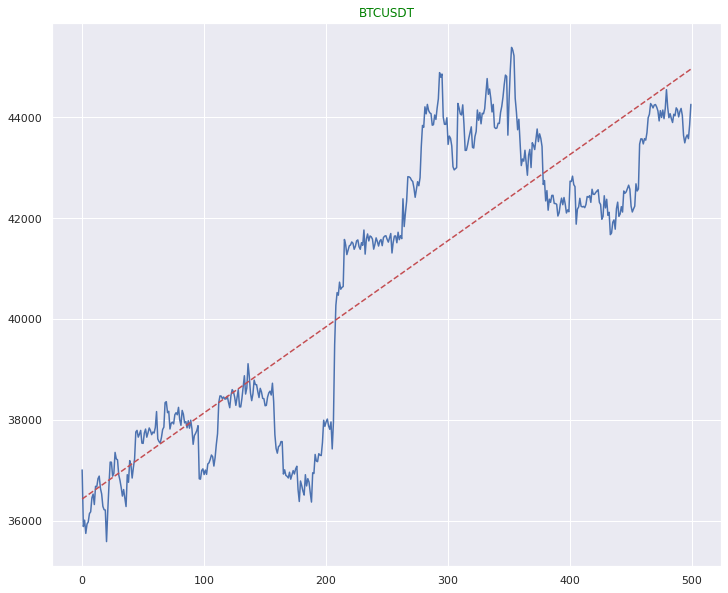

44951.86536431139

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)

y_pred_lin = regressor.predict(X)

plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(y)
plt.title(label=f'{symbol}', color="green")
plt.plot(y_pred_lin, '--', color='r')
plt.show()
y_pred_lin[-1]

Ekstrakcja cech wielomianowych - stopien 2

In [ ]:
df = pd.DataFrame(data={'X':X.ravel()})
df.head(10)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly009 = PolynomialFeatures(9)
X_poly009 = poly009.fit_transform(X)

poly008 = PolynomialFeatures(8)
X_poly008 = poly008.fit_transform(X)

poly007 = PolynomialFeatures(7)
X_poly007 = poly007.fit_transform(X)

poly006 = PolynomialFeatures(6)
X_poly006 = poly006.fit_transform(X)

poly005 = PolynomialFeatures(5)
X_poly005 = poly005.fit_transform(X)

poly004 = PolynomialFeatures(4)
X_poly004 = poly004.fit_transform(X)

In [ ]:
X_poly009.shape

(500, 10)

In [ ]:
df_1 = pd.DataFrame(X_poly009)
#df_1.columns = ['1','x','x^2']
df_1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0
3,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,19683.0
4,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,262144.0
5,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1953125.0
6,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,10077696.0
7,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,40353607.0
8,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,134217728.0
9,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,387420489.0


**Dopasowanie modelu**

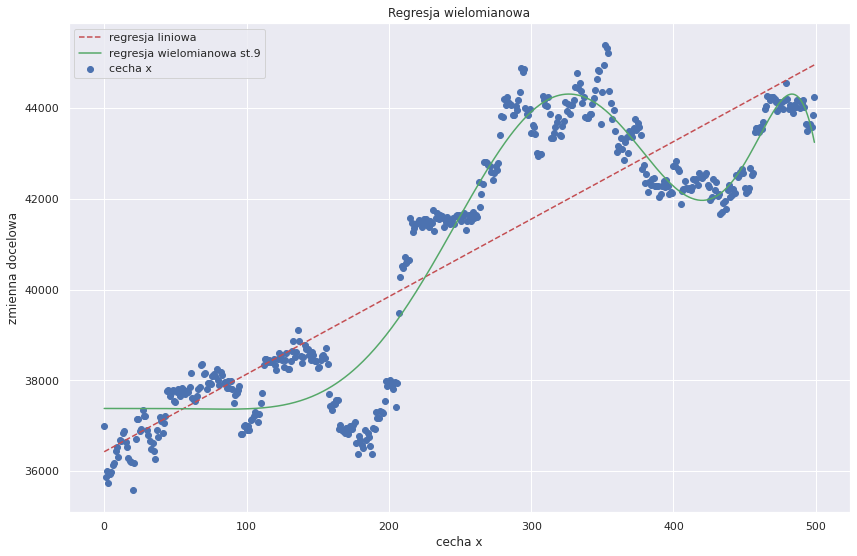

In [ ]:
regressor_poly = LinearRegression()

regressor_poly.fit(X_poly009,y)
y_pred_9 = regressor_poly.predict(X_poly009)

regressor_poly.fit(X_poly008,y)
y_pred_8 = regressor_poly.predict(X_poly008)

regressor_poly.fit(X_poly007,y)
y_pred_7 = regressor_poly.predict(X_poly007)

regressor_poly.fit(X_poly006,y)
y_pred_6 = regressor_poly.predict(X_poly006)

regressor_poly.fit(X_poly005,y)
y_pred_5 = regressor_poly.predict(X_poly005)

regressor_poly.fit(X_poly004,y)
y_pred_4 = regressor_poly.predict(X_poly004)

plt.figure(figsize=(14, 9))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X,y,label='cecha x')
plt.plot(X,y_pred_lin, '--', color='r',label='regresja liniowa')
plt.plot(X,y_pred_9, color='g',label='regresja wielomianowa st.9')
plt.legend()
plt.show()

In [ ]:
print(f'linear sklearn rscore: {r2_score(y, y_pred_lin)}')
print(r2_score(y, y_pred_9))
print(r2_score(y, y_pred_8))
print(r2_score(y, y_pred_7))
print(r2_score(y, y_pred_6))
print(r2_score(y, y_pred_5))
print(r2_score(y, y_pred_4))

linear sklearn rscore: 0.754484163758263
0.9282021670446395
0.9248323812334862
0.9071722130916695
0.9184331058742579
0.9156794403646948
0.8368661033536339


In [ ]:
fig = go.Figure()
ind = df.index[-500:].tolist()
std_plus = 1.03
std_min = 0.97
lin1_sklearn = y_pred_lin
lin2_sklearn = y_pred_lin - np.std(y_pred_lin)
lin3_sklearn = y_pred_lin + np.std(y_pred_lin)
poly9_sklearn = y_pred_9
poly9a_sklearn = y_pred_9 * std_plus
poly9b_sklearn = y_pred_9 * std_min
poly8_sklearn = y_pred_8
poly8a_sklearn = y_pred_8 * std_plus
poly8b_sklearn = y_pred_8 * std_min
poly7_sklearn = y_pred_7
poly7a_sklearn = y_pred_7 * std_plus
poly7b_sklearn = y_pred_7 * std_min
poly6_sklearn = y_pred_6
poly6a_sklearn = y_pred_6 * std_plus
poly6b_sklearn = y_pred_6 * std_min

#fig = go.Figure(data=go.Candlestick(x=df.index[-500:],open=df.open[-500:],high=df.high[-500:],low=df.low[-500:],close=df.close[-500:]))

fig.add_trace(go.Scatter(x=ind, y=y, name="price"))

fig.add_trace(go.Scatter(x=ind, y=poly6_sklearn, name="polynomial6",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly6a_sklearn, name=f"polynomial6*{std_plus}",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly6b_sklearn, name="polynomial6*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7_sklearn, name="polynomial7",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7a_sklearn, name="polynomial7*1.02",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly7b_sklearn, name="polynomial7*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly8_sklearn, name="polynomial8",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly8a_sklearn, name="polynomial8*1.02",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly8b_sklearn, name="polynomial8*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9_sklearn, name="polynomial9",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9a_sklearn, name=f"polynomial9*{std_plus}",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=poly9b_sklearn, name="polynomial9*0.98",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=ind, y=lin1_sklearn, name="linear",
                    line_shape='linear',line = dict(color=('red' if lin1_sklearn[0]>lin1_sklearn[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin2_sklearn, name="linear-std",
                    line_shape='linear',line = dict(color=('red' if lin1_sklearn[0]>lin1_sklearn[-1] else 'green'),width=2, dash='dash')))
fig.add_trace(go.Scatter(x=ind, y=lin3_sklearn, name="linear+std",
                    line_shape='linear',line = dict(color=('red' if lin1_sklearn[0]>lin1_sklearn[-1] else 'green'),width=2, dash='dash')))

fig.update_layout(title= f'Regression model {symbol} {interval}',width=950,height=600,legend=dict(x=1,y=0.5, traceorder='reversed', font_size=16))
fig.show()

In [ ]:
y_pred_lin[-1]

43948.51884191617

In [ ]:
lin1(x)[-1]

0.5628075544910177

In [ ]:
y_pred_7[-1]

42825.22449381896

In [ ]:
poly7(x)[-1]

0.5255061868676552

In [ ]:
import numpy as np
import numba

@numba.guvectorize(
    [
        "void(float32[:], uint64, float32[:])",
        "void(float64[:], uint64, float64[:])",
    ],
    "(n),()->(n)",
    nopython=True,
    target="parallel",
)
def moving_ols_guvec(y, window, out):
    
    n = y.size
    
    # force init with NaN, for clarity
    out[:] = np.nan
    
    x = np.arange(1,window+1)
    x_mean = x.mean()
    x_diff = x - x_mean
    denom = (x_diff**2).sum()
        
    for i in numba.prange(window-1, n):
        
        y_win = y[i-window+1:i+1]
        y_mean = y_win.mean()
        
        slope = (x_diff*(y_win-y_mean)).sum() / denom
        intercept = y_mean - slope * x_mean
        
        out[i] = slope * window + intercept

window_size = 500
numba_result = moving_ols_guvec(df.close, window_size, axis=0)
numba_result2 = moving_ols_guvec(df.close, window_size, axis=0)

numba_result2

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



timestamp
2021-11-16 20:00:00             NaN
2021-11-16 21:00:00             NaN
2021-11-16 22:00:00             NaN
2021-11-16 23:00:00             NaN
2021-11-17 00:00:00             NaN
                           ...     
2022-02-16 15:00:00    44914.328110
2022-02-16 16:00:00    44923.905136
2022-02-16 17:00:00    44929.968387
2022-02-16 18:00:00    44938.783901
2022-02-16 19:00:00    44951.865364
Name: close, Length: 2208, dtype: float64